In [5]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_recall_fscore_support
)


Accuracy: 0.63

Classification Report:
               precision    recall  f1-score   support

    negative     0.5278    0.6333    0.5758        30
     neutral     0.7600    0.6129    0.6786        62
    positive     0.4286    0.7500    0.5455         8

    accuracy                         0.6300       100
   macro avg     0.5721    0.6654    0.5999       100
weighted avg     0.6638    0.6300    0.6371       100


Precision: 0.5721
Recall:    0.6654
F1-Score:  0.5999

Confusion Matrix
 [[19 10  1]
 [17 38  7]
 [ 0  2  6]]


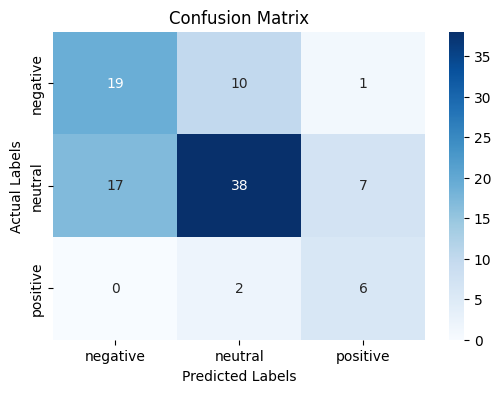

In [6]:
# Load Model and TF-IDF Vectorizer
model = joblib.load("nb_model.pkl")
vectorizer = joblib.load("tfidf.pkl")

# Load test dataset
df_test = pd.read_csv("heldout_test.csv")

# Prepare Data
X_test = df_test["text"]
y_test = df_test["label"]
X_test_tfidf = vectorizer.transform(X_test)

# Make Predictions
y_pred = model.predict(X_test_tfidf)

# Accuracy 
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
report = classification_report(y_test, y_pred, digits=4, zero_division=0)
print("\nClassification Report:\n", report)

#Precision, Recall, F1-score
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, y_pred, average="macro", zero_division=0
)

print(f"\nPrecision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

# Confusion Matrix
labels = ["negative", "neutral", "positive"]  
cm = confusion_matrix(y_test, y_pred, labels=labels)

print("\nConfusion Matrix\n", cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()